In [1]:
import numpy as np
import corner
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import integrate
from scipy.stats import multivariate_t
import matplotlib.colors as mcolors


In [2]:
df=3
sig1 = 2
sig2 = 3
correl = sig1*sig2*0.8
matrix=np.array([[sig1**2,correl],[correl,sig2**2]])
center=np.array([1,1])
Student_t = multivariate_t(df=df, shape=matrix, loc=center)

In [3]:
def student_t(X):

    return Student_t.pdf(X)

In [4]:

# Define the grid of points
x0 = np.linspace(-20, 20, 200)
y0 = np.linspace(-20, 20, 200)
X, Y = np.meshgrid(x0, y0)

pos = np.dstack((X, Y))
# pos = np.dstack((x0, y0))

In [5]:
# Compute the probability density function (PDF) of the multivariate t-distribution for each point
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = student_t(pos[i, j])

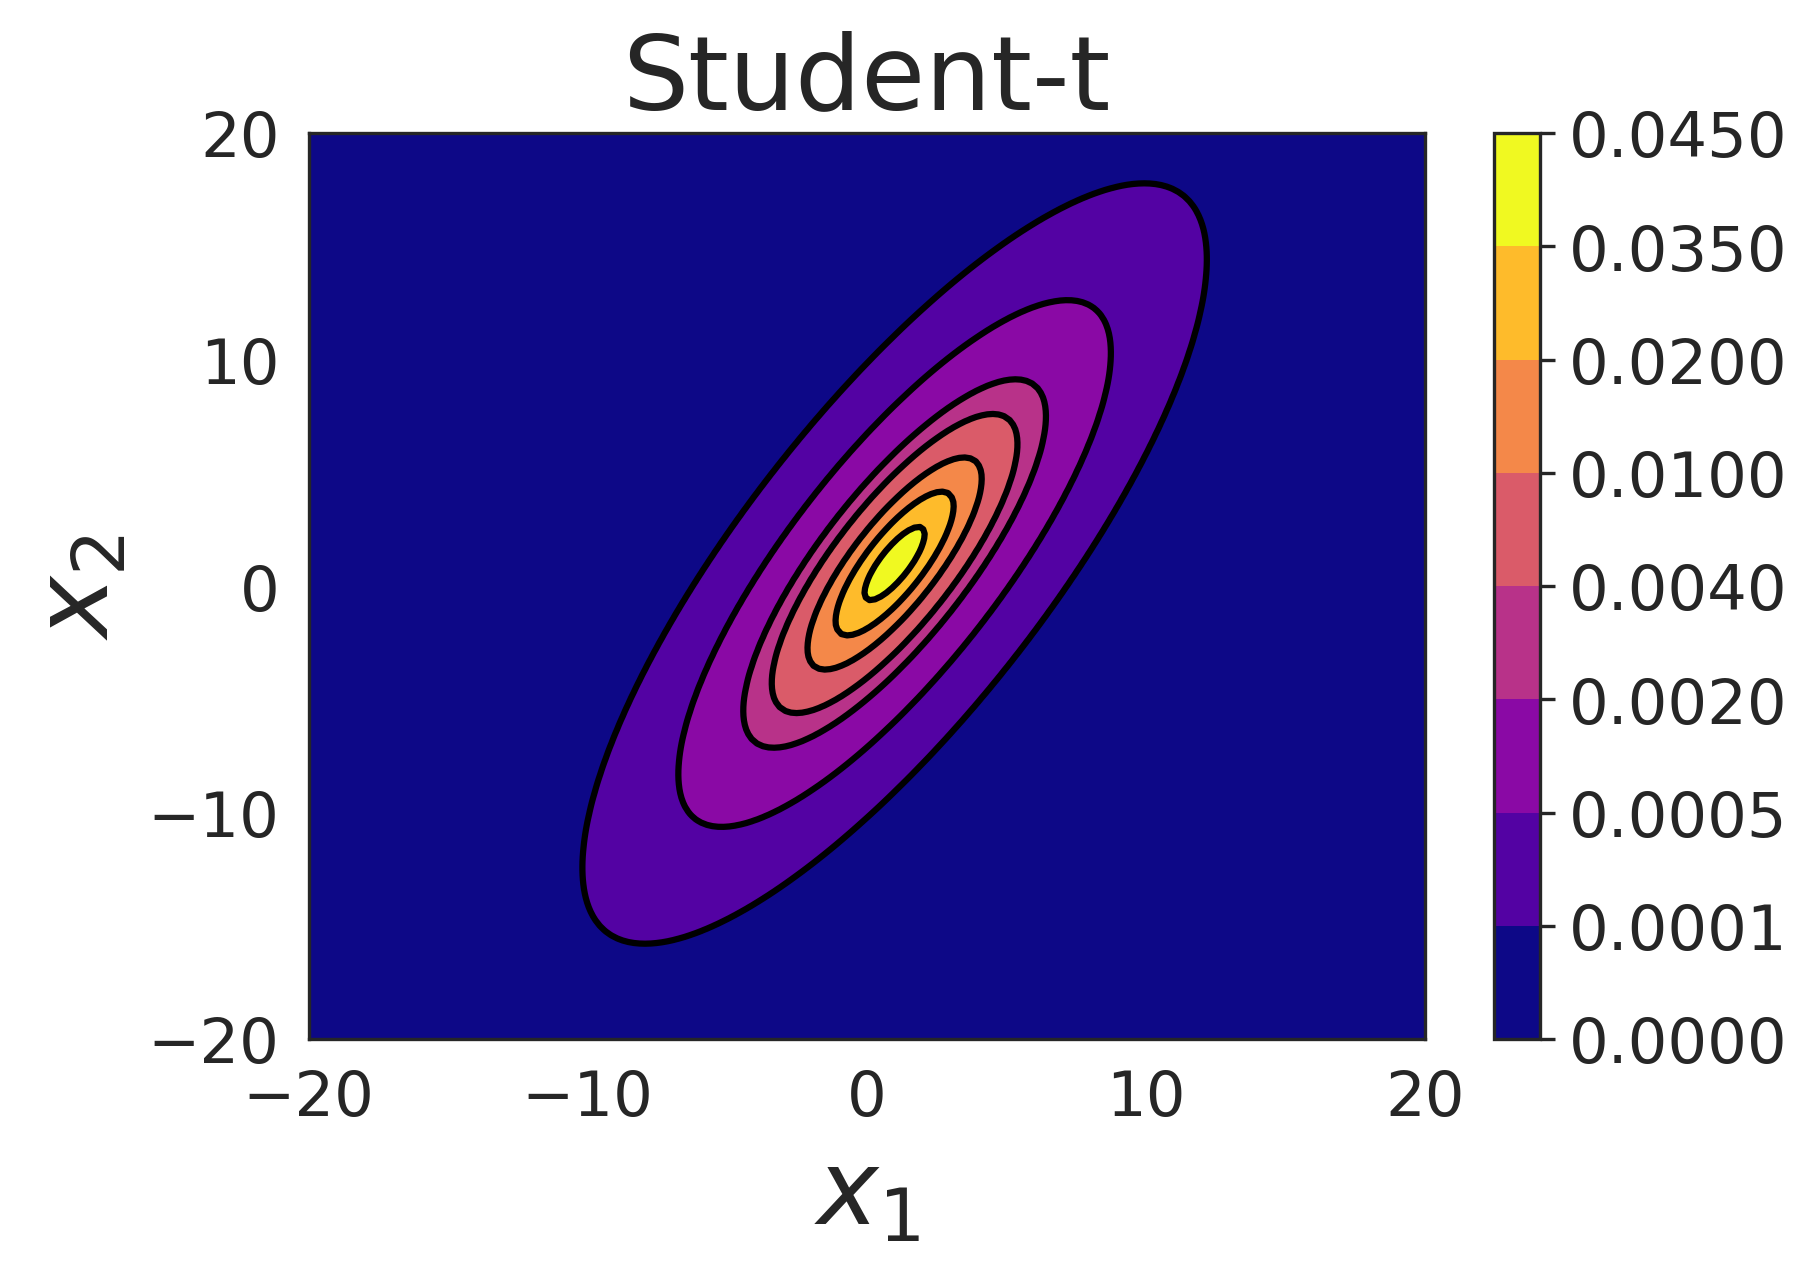

In [6]:

contour_levels = [0,0.0001,0.0005,0.002,0.004,0.01,0.02,0.035,0.045]
plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)

# Define a colormap
cmap = plt.get_cmap('plasma')
# cmap = plt.get_cmap('viridis')

# cmap = plt.get_cmap('gnuplot2')


# Create a normalization object using BoundaryNorm
norm = mcolors.BoundaryNorm(boundaries=contour_levels, ncolors=cmap.N)


sns.set_style("white")
plt.figure(figsize=(6,4),dpi=300)
contour_filled = plt.contourf(X, Y, Z, cmap=cmap,levels=contour_levels,norm=norm,vmin=0, vmax=0.045)  # 'viridis' is another colormap


cbar = plt.colorbar(contour_filled)





plt.contour(X, Y, Z,levels=contour_levels,colors='black')
plt.title('Student-t',fontsize=25)
plt.xlabel(r'$x_1$',fontsize=25)

plt.ylabel(r'$x_2$',fontsize=25)




plt.show()



In [8]:
def MCMCSampling(distr,sigma,num_iterations):

    #thermalizing
    burn_samples=10000
    # Set the initial state of the chain
    x_current, y_current = 1.0, 1.0

    # Set the standard deviation of the proposal distribution
#     sigma = 1.0

    # Set the number of iterations to run

#     num_iterations = 10000

    # Create empty lists to store the samples
    x_samples = []
    y_samples = []

    
    acceptance_times=0
    
    # Run the Metropolis-Hastings algorithm
    for i in range(burn_samples):
        # Propose a new state for the chain
        x_proposed = np.random.normal(x_current, sigma)
        y_proposed = np.random.normal(y_current, sigma)

        # Calculate the acceptance probability
        acceptance_prob = min(1, distr(x_proposed, y_proposed) / distr(x_current, y_current))

        # Accept or reject the proposal
        if np.random.uniform() < acceptance_prob:
            x_current, y_current = x_proposed, y_proposed
#             acceptance_times=acceptance_times+1

      
        
        
        
        
    for i in range(num_iterations):
        # Propose a new state for the chain
        x_proposed = np.random.normal(x_current, sigma)
        y_proposed = np.random.normal(y_current, sigma)

        # Calculate the acceptance probability
        acceptance_prob = min(1, distr(x_proposed, y_proposed) / distr(x_current, y_current))

        # Accept or reject the proposal
        if np.random.uniform() < acceptance_prob:
            x_current, y_current = x_proposed, y_proposed
            acceptance_times=acceptance_times+1

        # Store the current state as a sample
        x_samples.append(x_current)
        y_samples.append(y_current)   
        
        
#     skips=20 
#     obs_val=[]   
#     for j in range(int(len(x_samples)/skips)):
#         obs_val.append(R2(x_samples[j],y_samples[j]))
    
    
    
    
    
    print(acceptance_times/num_iterations*100,"%")
    
    return(np.array([x_samples,y_samples]),acceptance_times/num_iterations*100)

In [9]:
def student_t_2input(x1,x2):

    return Student_t.pdf([x1,x2])

In [40]:
%%time

MCMCRes1=MCMCSampling(student_t_2input,2.5,100000)[0]

44.690000000000005 %
CPU times: user 2.58 s, sys: 26.2 ms, total: 2.61 s
Wall time: 2.58 s


In [41]:
%%time
MCMCRes2=MCMCSampling(student_t_2input,2.5,100000)[0]

44.493 %
CPU times: user 2.66 s, sys: 66.7 ms, total: 2.72 s
Wall time: 2.64 s


In [24]:
bounds_new=[[-20,25],
            [-20,25]]

In [25]:
x1_grid=np.linspace(-20, 20, 200)
x2_grid=np.linspace(-20, 20, 200)

In [32]:
hx1vals=[]
hx2vals=[]

In [33]:
for i in range(len(x1_grid)):

    def student1D(x2):
        
        x1=x1_grid[i]

        return student_t_2input(x1,x2)

    hx1vals.append(integrate.quad(student1D,bounds_new[1][0], bounds_new[1][1])[0])

In [34]:
for i in range(len(x2_grid)):

    def student1D(x1):
        
        x2=x2_grid[i]

        return student_t_2input(x1,x2)


    hx2vals.append(integrate.quad(student1D,bounds_new[0][0], bounds_new[0][1])[0])

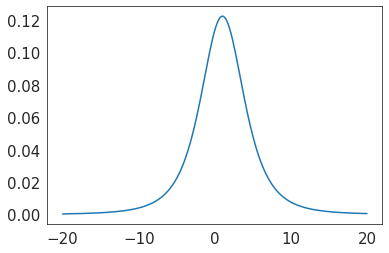

In [35]:
plt.plot(x2_grid,hx2vals)

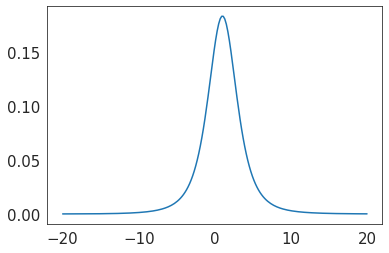

In [36]:
plt.plot(x1_grid,hx1vals)

In [37]:
hx1vals=np.array(hx1vals)
hx2vals=np.array(hx2vals)

In [53]:
nf_100k=MCMCRes1.T
mcmc_100k=MCMCRes2.T

In [54]:
combined_data = np.vstack((nf_100k, mcmc_100k))

In [61]:
bins_total=[150,150]

In [62]:
bins = [np.histogram_bin_edges(combined_data[:, i], bins=bins_total[i]) for i in range(combined_data.shape[1])]

In [63]:
w0=(bins[0][1]-bins[0][0])
w1=(bins[1][1]-bins[1][0])


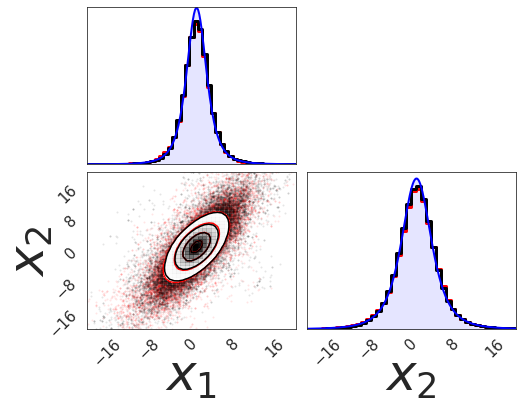

In [64]:
dim=len(nf_100k[0])


plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)
    
figure = corner.corner(nf_100k,density=True,
    labels=['$x_1$','$x_2$'],
    labelpad=0, color='r',
                       weights=np.full(len(nf_100k),(len(mcmc_100k))/(len(nf_100k))),
                       
             bins=bins,
    label_kwargs={"fontsize":30},
                      hist_kwargs= {"linewidth":3},
    quantiles=None,
#                        truths=[x1_mean,x2_mean], truth_color='r'
                       
    smooth=(1.7)
                       ,
    smooth1d=1.0, range=[[-20,20],[-20,20]]
                      )




corner.corner(mcmc_100k,density=True,fig=figure,
    labels=['$x_1$','$x_2$'], color='k',
                   
#                        weights=np.full(len(mcmc_100k),(len(nf_100k))/(len(mcmc_100k))),
                       
             bins=bins,
#               bins=40,
                       
    label_kwargs={"fontsize":50},
                      hist_kwargs= {"linewidth":3},
    quantiles=None,
#                        truths=alphaCentralPrior, truth_color='g'
                       
    smooth=(1.7)
                       ,
    smooth1d=1.0,
             range=[[-20,20],[-20,20]]
                      )





axes = np.array(figure.axes).reshape((dim, dim))


ax=axes[0,0]
ax.plot(x1_grid,100000*w0*hx1vals,color='b',linewidth=2)
ax.fill_between(x1_grid, 100000*w0*hx1vals, color='blue', alpha=0.1)





ax=axes[1,1]
ax.plot(x2_grid,100000*w1*hx2vals,color='b',linewidth=2)
ax.fill_between(x2_grid, 100000*w1*hx2vals, color='blue', alpha=0.1)

ax.xaxis.set_label_coords(0.5, -0.15)  
# ax.set_ylim(0,11000)

ax=axes[1,0]
ax.xaxis.set_label_coords(0.5, -0.15) 
ax.yaxis.set_label_coords(-0.15, 0.5)







width = 8
height = 6
figure.set_size_inches(width, height)









